
First 5 rows:
          day  units_sold  price
0  2024-01-01          10   25.5
1  2024-01-02          12   26.0
2  2024-01-03           9   24.0
3  2024-01-04          14   27.0
4  2024-01-05          11   25.0

Money made from sales:
62671.5

Average units sold per transaction:
12.214285714285714

Day with the most sales:
2024-01-14


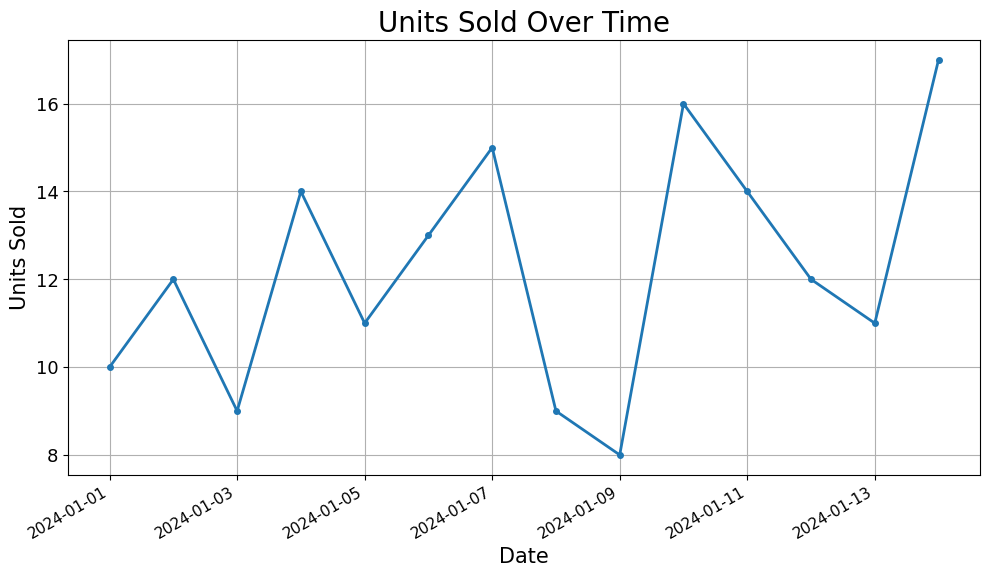

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


def file_import(file_path):
    """
    Import CSV file into DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"An error occurred while importing the file: {e}")
        return None
def explore_data(sales_data):
    """
    Display basic information about the data.

    Args:
        sales_data (pd.DataFrame): DataFrame with columns 'price', 'day', and 'units_sold'

    Returns:
        None
    """
    print("\nFirst 5 rows:")
    print(sales_data.head())
    sold = (sales_data['units_sold'].sum()) * (sales_data['price'].sum())
    print("\nMoney made from sales:")
    print(sold)

    avg_units_sold = sales_data['units_sold'].mean()
    print("\nAverage units sold per transaction:")
    print(avg_units_sold)

    day_with_most_sales = sales_data.groupby('day')['units_sold'].sum().idxmax()
    print("\nDay with the most sales:")
    print(day_with_most_sales)

    

def sales_visualisation(sales_data):
    """
    Visualise unites sold over time.

    Parameters:
        sales_data (pd.DataFrame): DataFrame with columns 'day' and 'units_sold'

    Returns:
        None
    """


    sales_data['day'] = pd.to_datetime(sales_data['day'])
    daily_sales = sales_data.groupby('day')['units_sold'].sum()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4)
    ax.set_title('Units Sold Over Time', fontsize=20)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('Units Sold', fontsize=15)
    plt.xticks(rotation=90, fontsize=11) 
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.grid(True)
    fig.autofmt_xdate()
    plt.show()


if __name__ == "__main__":
    PATH = './sales.csv' 
    
    sales_data = file_import(PATH)
    
    if sales_data is not None:
        explore_data(sales_data)
        sales_visualisation(sales_data)
    else:
        print("Process aborted: Could not load data.")
